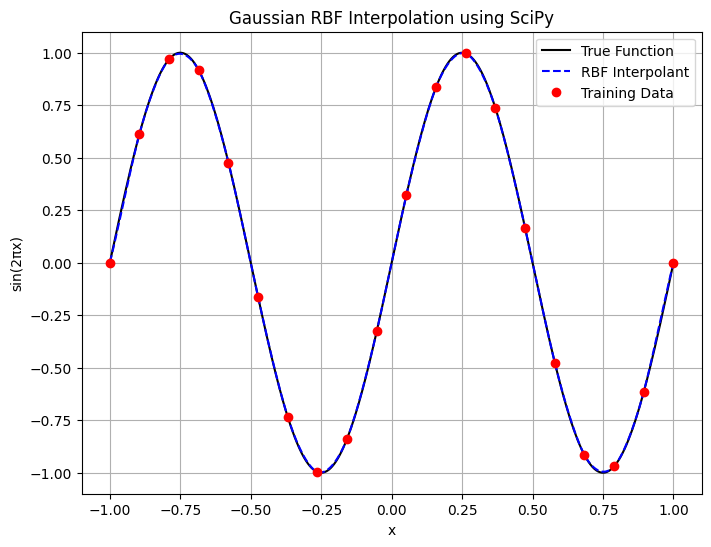

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

# 1. Generate training data:
# We sample 20 data points from the function sin(2πx)
x_train = np.linspace(-1, 1, 20)
y_train = np.sin(2 * np.pi * x_train)

# 2. Create an RBF interpolator:
# Here, we choose the 'gaussian' function. 
rbf_interpolator = Rbf(x_train, y_train, function='thin_plate')

# 3. Evaluate the interpolator on a dense grid:
x_dense = np.linspace(-1, 1, 300)
y_dense = rbf_interpolator(x_dense)

# Compute the true values for comparison:
y_true = np.sin(2 * np.pi * x_dense)

# 4. Plot the results:
plt.figure(figsize=(8, 6))
plt.plot(x_dense, y_true, 'k-', label='True Function')
plt.plot(x_dense, y_dense, 'b--', label='RBF Interpolant')
plt.plot(x_train, y_train, 'ro', label='Training Data')
plt.title("Gaussian RBF Interpolation using SciPy")
plt.xlabel("x")
plt.ylabel("sin(2πx)")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
from sklearn.datasets import make_friedman2

In [11]:
X, y = make_friedman2(n_samples=50, noise=0, random_state=0)

In [12]:
print(X.shape)
print(y.shape)

(50, 4)
(50,)


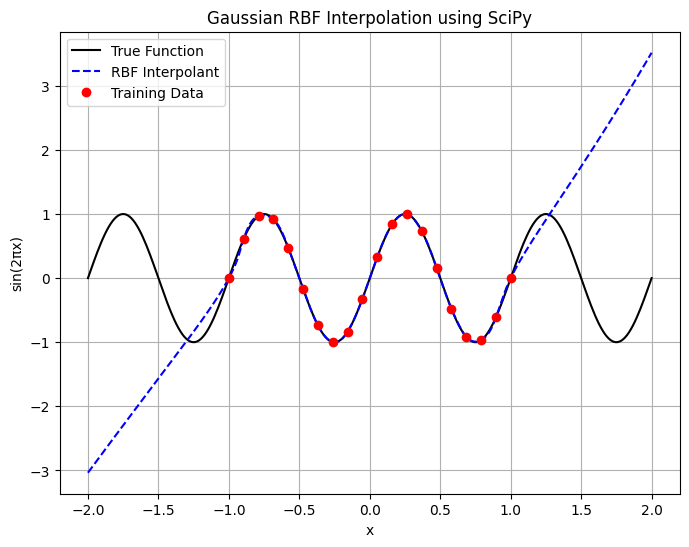

In [35]:
# Hand-pick the observables
def generate_thin_plate_rbf(nx, n_centers=100):
    centers = np.random.uniform(-1, 1, (n_centers, nx))
    
    def evaluate(X):
        # Compute the radial basis function values
        dists = np.linalg.norm(X[:, None, :] - centers[None, :, :], axis=-1)  # shape: (B, num_centers)
        with np.errstate(divide='ignore', invalid='ignore'):
            rbf = dists**2 * np.log(dists)
            rbf[np.isnan(rbf)] = 0.0  # set r=0 cases to 0
        
        return rbf
    
    return evaluate

x_train = np.linspace(-1, 1, 20).reshape(-1, 1)
y_train = np.sin(2 * np.pi * x_train).reshape(-1, 1)

rbf_evaluate = generate_thin_plate_rbf(nx=1, n_centers=50)
A = rbf_evaluate(x_train)

lambdas = np.linalg.lstsq(A, y_train, rcond=None)[0]

def rbf_predict(X):
    A = rbf_evaluate(X)
    return A @ lambdas

x_dense = np.linspace(-2, 2, 300).reshape(-1, 1)
y_true = np.sin(2 * np.pi * x_dense).reshape(-1, 1)
y_dense = rbf_predict(x_dense)

plt.figure(figsize=(8, 6))
plt.plot(x_dense, y_true, 'k-', label='True Function')
plt.plot(x_dense, y_dense, 'b--', label='RBF Interpolant')
plt.plot(x_train, y_train, 'ro', label='Training Data')
plt.title("Gaussian RBF Interpolation using SciPy")
plt.xlabel("x")
plt.ylabel("sin(2πx)")
plt.legend()
plt.grid(True)
plt.show()

(32, 10)


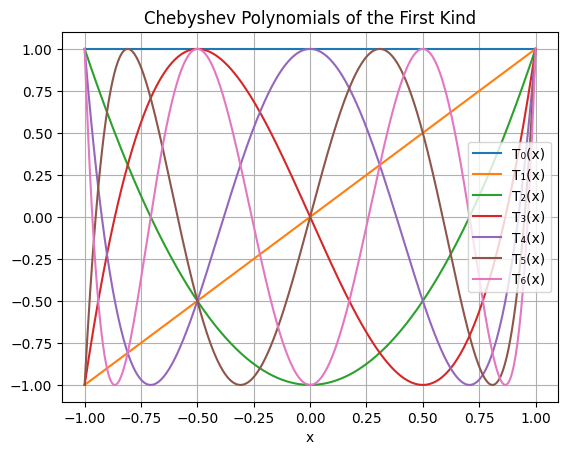

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import Chebyshev

# Generate the first few Chebyshev polynomials of the first kind
Tn = lambda n : Chebyshev([0] * n + [1])

T0 = Tn(0)
T1 = Tn(1)
T2 = Tn(2)
T3 = Tn(3)
T4 = Tn(4)
T5 = Tn(5)
T6 = Tn(6)

# T0 = Chebyshev([1])              # T_0(x) = 1
# T1 = Chebyshev([0, 1])           # T_1(x) = x
# T2 = Chebyshev([0, 0, 1])        # T_2(x) = 2x^2 - 1
# T3 = Chebyshev([0, 0, 0, 1])     # T_3(x) = 4x^3 - 3x
# T4 = Chebyshev([0, 0, 0, 0, 1])  # T_3(x) = 4x^3 - 3x

print(T0(np.random.randn(32, 10)).shape)

# Evaluate on a grid
x = np.linspace(-1, 1, 500)
plt.plot(x, T0(x), label='T₀(x)')
plt.plot(x, T1(x), label='T₁(x)')
plt.plot(x, T2(x), label='T₂(x)')
plt.plot(x, T3(x), label='T₃(x)')
plt.plot(x, T4(x), label='T₄(x)')
plt.plot(x, T5(x), label='T₅(x)')
plt.plot(x, T6(x), label='T₆(x)')

plt.title("Chebyshev Polynomials of the First Kind")
plt.xlabel("x")
plt.grid(True)
plt.legend()
plt.show()


Text(0.5, 1.0, 'Chebyshev Polynomial Approximation')

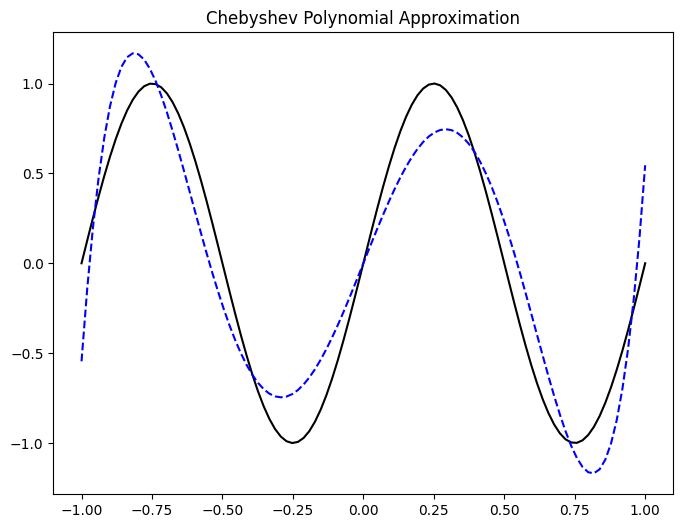

In [42]:
from numpy.polynomial.chebyshev import chebfit, chebval

# Sample a function
x = np.linspace(-1, 1, 100)
y = np.sin(2 * np.pi * x)

# Fit a Chebyshev series of degree 5
coeffs = chebfit(x, y, deg=5)

# Evaluate the approximation
y_fit = chebval(x, coeffs)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'k-', label='True Function')
plt.plot(x, y_fit, 'b--', label='Chebyshev Fit')
plt.title("Chebyshev Polynomial Approximation")